In [1]:
source_folder = r'D:\EAS 503 Python\Project\Working\Source data'

In [2]:
# Importing all the Required Libraries
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
import os
for dirname, _, filenames in os.walk(source_folder):
    for filename in filenames:
        print(os.path.join(dirname, filename))

D:\EAS 503 Python\Project\Working\Source data\business.csv
D:\EAS 503 Python\Project\Working\Source data\Clean_Dataset.csv
D:\EAS 503 Python\Project\Working\Source data\economy.csv


# Database creation steps

In [3]:
def create_connection(db_file, delete_db=False):
    import os
    if delete_db and os.path.exists(db_file):
        os.remove(db_file)

    conn = None
    try:
        conn = sqlite3.connect(db_file)
        conn.execute("PRAGMA foreign_keys = 1")
    except Error as e:
        print(e)

    return conn

In [4]:
def create_table(conn, create_table_sql, drop_table_name=None):
    
    if drop_table_name: # You can optionally pass drop_table_name to drop the table. 
        try:
            c = conn.cursor()
            c.execute("""DROP TABLE IF EXISTS %s""" % (drop_table_name))
        except Error as e:
            print(e)
    
    try:
        c = conn.cursor()
        c.execute(create_table_sql)
    except Error as e:
        print(e)


In [5]:
def execute_sql_statement(sql_statement, conn):
    cur = conn.cursor()
    cur.execute(sql_statement)

    rows = cur.fetchall()

    return rows

In [6]:
def insert_query(conn,query,values):
    cur = conn.cursor()
    with conn:
        cur.executemany(query, values)

# Creating Data Sets

In [7]:
data_file = r'D:\EAS 503 Python\Project\Working\Source data\Clean_Dataset.csv'
final_data = []
header = None
with open(data_file,'r') as file:
    for line in file:
        if not header:
            header = line.strip().split(',')[1:]
            continue
        data = line.strip().split(',')[1:]
        final_data.append(dict(zip(header,data)))

In [8]:
list(final_data[1].keys())

['airline',
 'flight',
 'source_city',
 'departure_time',
 'stops',
 'arrival_time',
 'destination_city',
 'class',
 'duration',
 'days_left',
 'price']

# Creating Connection

In [9]:
conn = create_connection('normalized.db', delete_db=True)

### Insert Query

In [10]:
insert_sql = """INSERT INTO {table_name}({column_name})
            VALUES(?)"""


## Airline data

In [11]:
airline = []
for i in final_data:
    if (i['airline'],) not in airline:
        airline.append((i['airline'],))
# print(airline)

### Airline create table

In [12]:
airline_ddl      = """CREATE TABLE Airline(
                        AirlineID INTEGER NOT NULL PRIMARY KEY,
                        Airline TEXT)"""
create_table(conn, airline_ddl, drop_table_name='Airline')

### Insert airline query

In [13]:
query = insert_sql.format(table_name='Airline',column_name='Airline')
print(query)
insert_query(conn,query,sorted(airline))

INSERT INTO Airline(Airline)
            VALUES(?)


### Airline dictionary

In [14]:
query = "SELECT * from Airline"
airline_data = execute_sql_statement(query, conn)
airline_dict = {}
for i in airline_data:
    airline_dict[i[1]] = i[0]
# airline_dict

## City data

In [15]:
City = []
for i in final_data:
    if (i['destination_city'],) not in City:
        City.append((i['destination_city'],))
    if (i['source_city'],) not in City:
        City.append((i['source_city'],))
# print(sorted(City))

### Create City Table

In [16]:
city_ddl = """CREATE TABLE City(
                        CityID INTEGER NOT NULL PRIMARY KEY,
                        City TEXT)"""
create_table(conn, city_ddl, drop_table_name='City')

### Insert City data

In [17]:
query = insert_sql.format(table_name='City',column_name='City')
print(query)
insert_query(conn,query,sorted(City))

INSERT INTO City(City)
            VALUES(?)


### Create city foreign keys

In [18]:
query = "SELECT * from City"
city_data = execute_sql_statement(query, conn)
city_dict = {}
for i in city_data:
    city_dict[i[1]] = i[0]
city_dict

{'Bangalore': 1,
 'Chennai': 2,
 'Delhi': 3,
 'Hyderabad': 4,
 'Kolkata': 5,
 'Mumbai': 6}

## Arrival Time

In [19]:
arrival_departure_time = []
for i in final_data:
    if (i['arrival_time'],) not in arrival_departure_time:
        arrival_departure_time.append((i['arrival_time'],))
    if (i['departure_time'],) not in arrival_departure_time:
        arrival_departure_time.append((i['departure_time'],))
# print(sorted(arrival_departure_time))

### Create table DDL

In [20]:
arrival_time_ddl = """CREATE TABLE Arrival_time(
                        ArrivaltimeID INTEGER NOT NULL PRIMARY KEY,
                        scheduled_arrival TEXT)"""
create_table(conn, arrival_time_ddl, drop_table_name='Arrival_time')

### Insert arrival time data

In [21]:
query = insert_sql.format(table_name='Arrival_time',column_name='scheduled_arrival')
print(query)
insert_query(conn,query,sorted(arrival_departure_time))

INSERT INTO Arrival_time(scheduled_arrival)
            VALUES(?)


### Create arrival time fk

In [22]:
query = "SELECT * from Arrival_time"
time_data = execute_sql_statement(query, conn)
time_dict = {}
for i in time_data:
    time_dict[i[1]] = i[0]
time_dict

{'Afternoon': 1,
 'Early_Morning': 2,
 'Evening': 3,
 'Late_Night': 4,
 'Morning': 5,
 'Night': 6}

## Number of Stops

In [23]:
stops = []
for i in final_data:
    if (i['stops'],) not in stops:
        stops.append((i['stops'],))
# print(sorted(stops))

### Create table number of stops

In [24]:
no_of_stops_ddl  = """CREATE TABLE Number_of_stops(
                        Stop_id INTEGER NOT NULL PRIMARY KEY,
                        Stop_count TEXT)"""

create_table(conn, no_of_stops_ddl, drop_table_name='Number_of_stops')

### Insert data for number of stops

In [25]:
query = insert_sql.format(table_name='Number_of_stops',column_name='Stop_count')
print(query)
insert_query(conn,query,sorted(stops))

INSERT INTO Number_of_stops(Stop_count)
            VALUES(?)


### Create number of stops fk

In [26]:
query = "SELECT * from Number_of_stops"
no_of_stops_data = execute_sql_statement(query, conn)
no_of_stops_dict = {}
for i in no_of_stops_data:
    no_of_stops_dict[i[1]] = i[0]
# no_of_stops_dict

## Ticket class

In [27]:
ticket_class = []
for i in final_data:
    if (i['class'],) not in ticket_class:
        ticket_class.append((i['class'],))
# print(sorted(ticket_class))

### Create table ticket_class

In [28]:
ticket_type_ddl  = """CREATE TABLE Ticket_class(
                        TicketID INTEGER NOT NULL PRIMARY KEY,
                        ticket_type TEXT
                        )"""
create_table(conn, ticket_type_ddl, drop_table_name='Ticket_class')

### Insert data for ticket_class

In [29]:
query = insert_sql.format(table_name='Ticket_class',column_name='ticket_type')
print(query)
insert_query(conn,query,sorted(ticket_class))

INSERT INTO Ticket_class(ticket_type)
            VALUES(?)


### create ticket_class dict

In [30]:
query = "SELECT * from Ticket_class"
ticket_class_data = execute_sql_statement(query, conn)
ticket_class_dict = {}
for i in ticket_class_data:
    ticket_class_dict[i[1]] = i[0]
# ticket_class_dict

## Flights

In [31]:
flight_data = []
for i in final_data:
    flight_info = (i['flight'],i['source_city'],i['destination_city'])
    if flight_info not in flight_data:
        flight_data.append(flight_info)
# print(sorted(flight_data))
flight_data.sort()

## Create Table Flight data

In [32]:
flights_ddl  = """CREATE TABLE Flights(
                        FlightID INTEGER NOT NULL PRIMARY KEY,
                        Flight_Number TEXT,
                        source_city TEXT,
                        destination_city TEXT
                        )"""
create_table(conn, flights_ddl, drop_table_name='Flights')

## Insert Flight data

In [33]:
insert_flights = """INSERT INTO Flights(Flight_Number,source_city,destination_city)
            VALUES(?,?,?)"""

insert_query(conn,insert_flights,flight_data)

## Flight data dict

In [34]:
query = "SELECT * from Flights"
flights_data = execute_sql_statement(query, conn)
flights_dict = {}
for i in flights_data:
    flights_dict[i[1:]] = i[0]
# flights_dict

# Creating the normalized table

In [35]:
final_data[0]

{'airline': 'SpiceJet',
 'flight': 'SG-8709',
 'source_city': 'Delhi',
 'departure_time': 'Evening',
 'stops': 'zero',
 'arrival_time': 'Night',
 'destination_city': 'Mumbai',
 'class': 'Economy',
 'duration': '2.17',
 'days_left': '1',
 'price': '5953'}

## Flight fares

In [36]:
flight_fare_data = []
for i in final_data:
    flight_fare_data.append((airline_dict[i['airline']]
                            ,flights_dict[(i['flight'],i['source_city'],i['destination_city'])]
                            ,time_dict[i['departure_time']]
                            ,no_of_stops_dict[i['stops']]
                            ,time_dict[i['arrival_time']]
                            ,ticket_class_dict[i['class']]
                            ,float(i['duration'])
                            ,int(i['days_left'])
                            ,int(i['price'])))

## Create flight fares

In [37]:
flight_fare_ddl  = """CREATE TABLE Flight_Fare(
                        Flight_Fare_ID INTEGER NOT NULL PRIMARY KEY,
                        airlineID INTEGER,
                        FlightID INTEGER,
                        departure_time_id INTEGER,
                        stop_id INTEGER,
                        arrival_time_id INTEGER,
                        ticketID INTEGER,
                        duration INTEGER,
                        days_left INTEGER,
                        price INTEGER,
                        FOREIGN KEY(airlineID) REFERENCES Airline(AirlineID),
                        FOREIGN KEY(FlightID) REFERENCES Flights(FlightID),
                        FOREIGN KEY(arrival_time_id) REFERENCES Arrival_time(ArrivaltimeID),
                        FOREIGN KEY(stop_id) REFERENCES Number_of_stops(Stop_id),
                        FOREIGN KEY(departure_time_id) REFERENCES Arrival_time(ArrivaltimeID),
                        FOREIGN KEY(ticketID) REFERENCES Ticket_class(TicketID)
                        )"""
create_table(conn, flight_fare_ddl, drop_table_name='Flight_Fare')

## Insert flight fares

In [38]:
insert_flight_fares = """INSERT INTO Flight_Fare(airlineID,FlightID,departure_time_id,stop_id,arrival_time_id,ticketID,duration,days_left,price)
            VALUES(?,?,?,?,?,?,?,?,?)"""

insert_query(conn,insert_flight_fares,flight_fare_data)

In [39]:
select_query = """--SQLite
SELECT Airline airline
        ,Flight_Number flight
        ,source_city source_city
        ,dest_at.scheduled_arrival departure_time
        ,Stop_count stops
        ,src_at.scheduled_arrival arrival_time
        ,destination_city destination_city
        ,TC.ticket_type class
        ,duration
        ,days_left
        ,price
    FROM Flight_Fare ff
    INNER JOIN Airline A
        ON ff.AirlineID = A.airlineID
    INNER JOIN Flights F
        ON F.FlightID = ff.FlightID
    INNER JOIN Number_of_stops S
        ON S.stop_id = ff.stop_id
    INNER JOIN Arrival_time src_at
        ON src_at.arrivaltimeid = ff.arrival_time_id
    INNER JOIN Arrival_time dest_at
        ON dest_at.arrivaltimeid = ff.departure_time_id
    INNER JOIN Ticket_class TC
        ON TC.ticketID = ff.ticketID"""

In [40]:
df_data = pd.read_sql_query(select_query, conn)

In [41]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


# Regression Techniques

In [42]:
df_data.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [43]:
# Lets see what is in the Data
df_data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [44]:
# Stastical Description of Data
df_data.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [45]:
df_data.corr().T

,duration,days_left,price
duration,1.000000,-0.039157,0.204222
days_left,-0.039157,1.000000,-0.091949
price,0.204222,-0.091949,1.000000


In [46]:
# Size of the data 
df_data.shape

(300153, 11)

## Finding the count of flights by ariline

In [47]:
df1=df_data.groupby(['flight','airline'],as_index=False).count()
df1.airline.value_counts()

Indigo       704
Air_India    218
GO_FIRST     205
SpiceJet     186
Vistara      133
AirAsia      115
Name: airline, dtype: int64

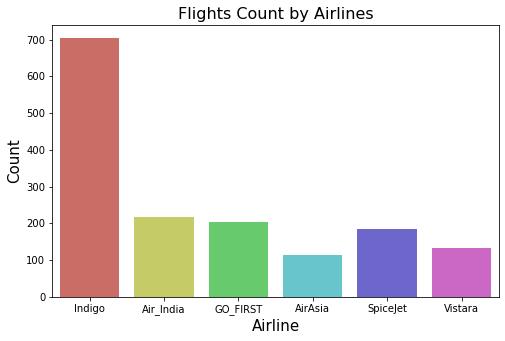

In [48]:
plt.figure(figsize=(8,5))
sns.countplot(df1['airline'],palette='hls')
plt.title('Flights Count by Airlines',fontsize=16)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

In [49]:
df2=df_data.groupby(['flight','airline','class'],as_index=False).count()
df2['class'].value_counts()

Economy     1560
Business     295
Name: class, dtype: int64

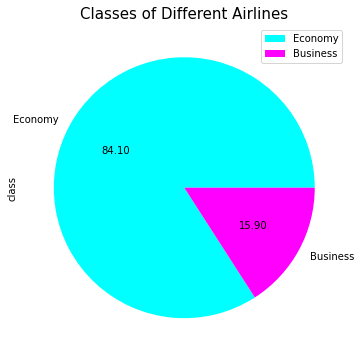

In [50]:
plt.figure(figsize=(8,6))
df2['class'].value_counts().plot(kind='pie',textprops={'color':'black'},autopct='%.2f',cmap='cool')
plt.title('Classes of Different Airlines',fontsize=15)
plt.legend(['Economy','Business'])
plt.show()

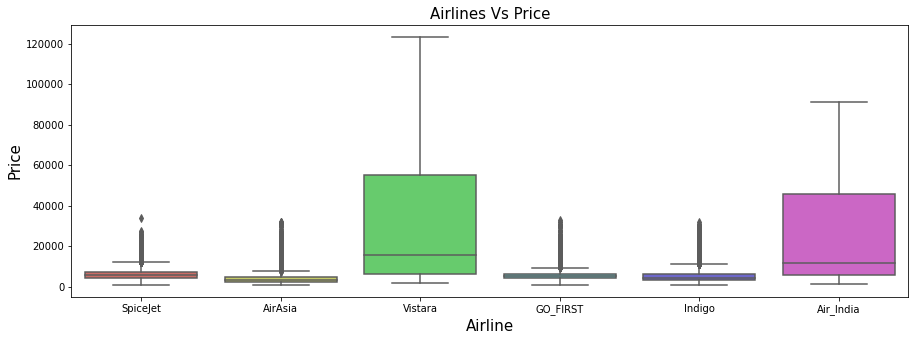

In [51]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df_data['airline'],y=df_data['price'],palette='hls')
plt.title('Airlines Vs Price',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

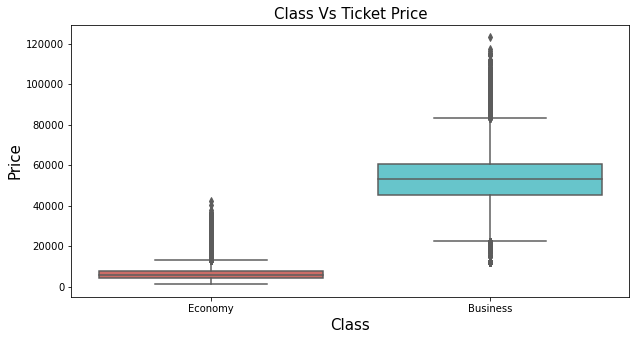

In [52]:
plt.figure(figsize=(10,5))
sns.boxplot(x='class',y='price',data=df_data,palette='hls')
plt.title('Class Vs Ticket Price',fontsize=15)
plt.xlabel('Class',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

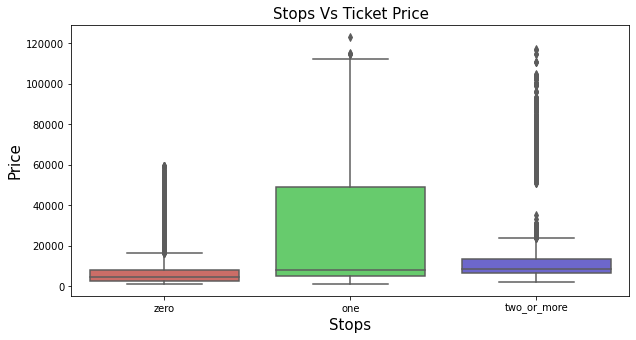

In [53]:
plt.figure(figsize=(10,5))
sns.boxplot(x='stops',y='price',data=df_data,palette='hls')
plt.title('Stops Vs Ticket Price',fontsize=15)
plt.xlabel('Stops',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

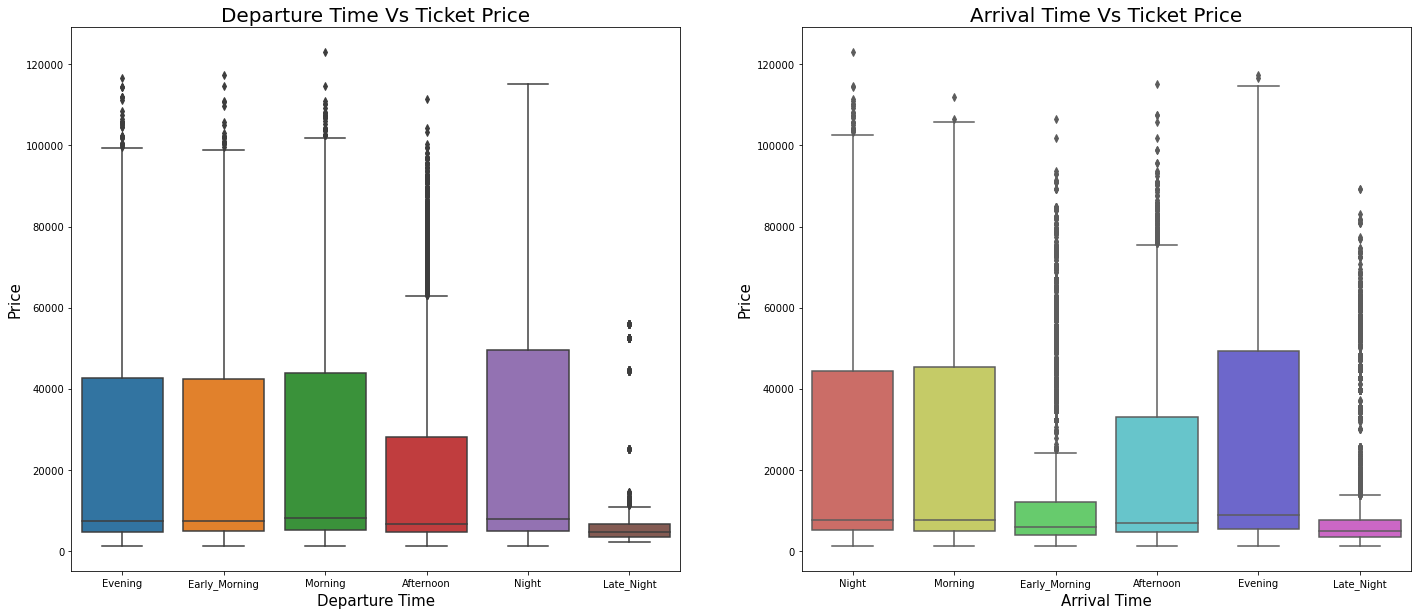

In [54]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='departure_time',y='price',data=df_data)
plt.title('Departure Time Vs Ticket Price',fontsize=20)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='arrival_time',y='price',data=df_data,palette='hls')
plt.title('Arrival Time Vs Ticket Price',fontsize=20)
plt.xlabel('Arrival Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

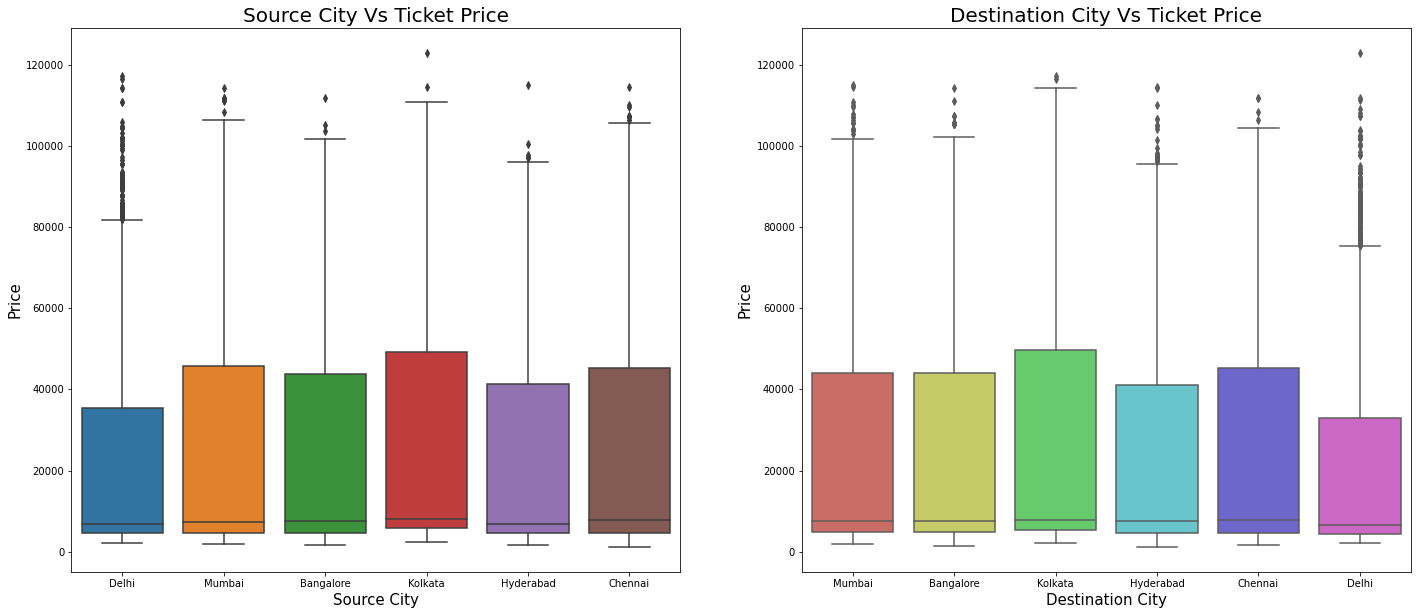

In [55]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='source_city',y='price',data=df_data)
plt.title('Source City Vs Ticket Price',fontsize=20)
plt.xlabel('Source City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='destination_city',y='price',data=df_data,palette='hls')
plt.title('Destination City Vs Ticket Price',fontsize=20)
plt.xlabel('Destination City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

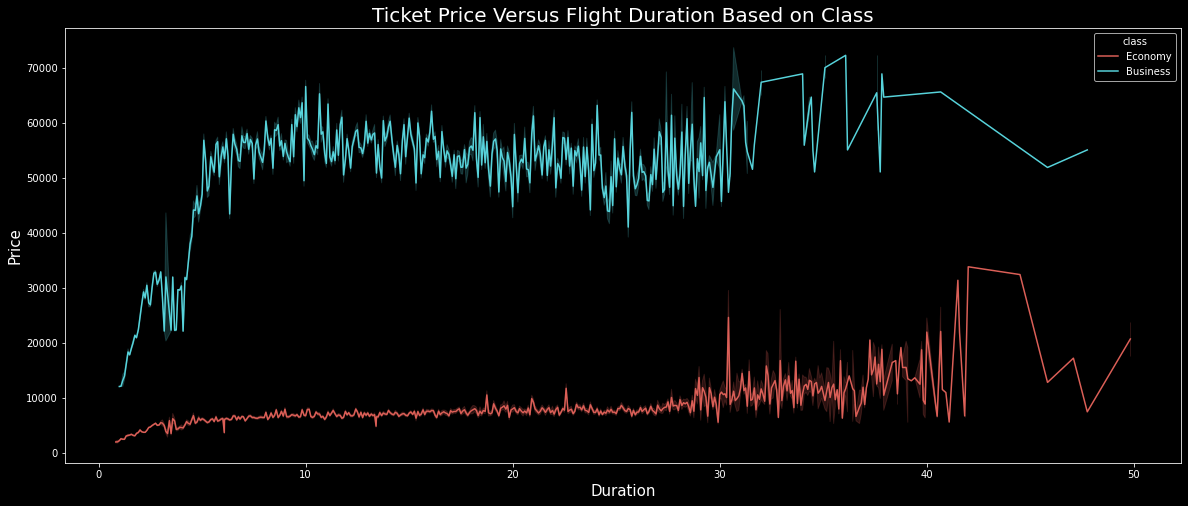

In [56]:
plt.style.use('dark_background')
plt.figure(figsize=(20,8))
sns.lineplot(data=df_data,x='duration',y='price',hue='class',palette='hls')
plt.title('Ticket Price Versus Flight Duration Based on Class',fontsize=20)
plt.xlabel('Duration',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

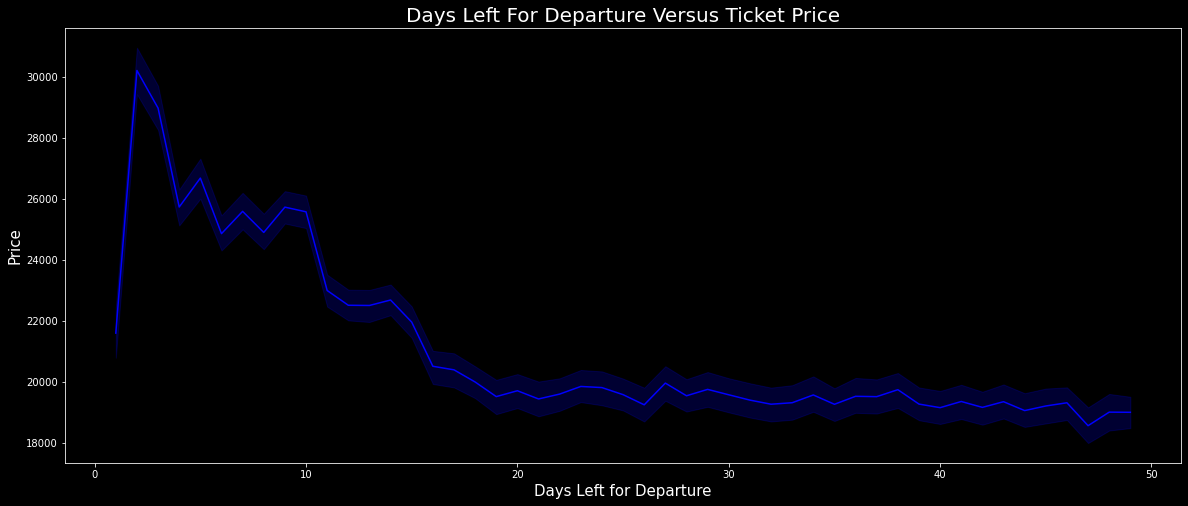

In [57]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df_data,x='days_left',y='price',color='blue')
plt.title('Days Left For Departure Versus Ticket Price',fontsize=20)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

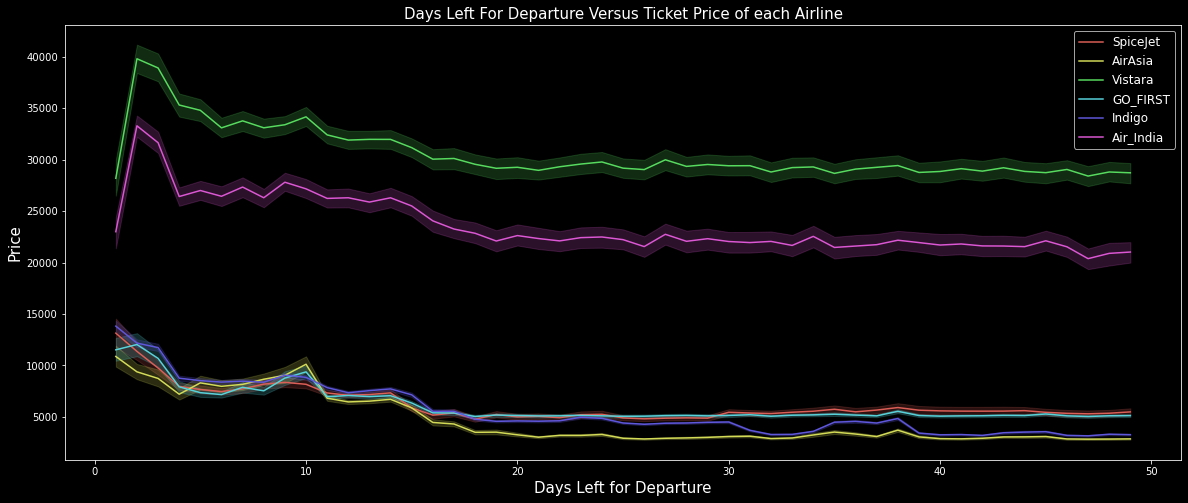

In [58]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df_data,x='days_left',y='price',color='blue',hue='airline',palette='hls')
plt.title('Days Left For Departure Versus Ticket Price of each Airline',fontsize=15)
plt.legend(fontsize=12)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

In [59]:
df_data.groupby(['flight','source_city','destination_city','airline','class'],as_index=False).count().groupby(['source_city','destination_city'],as_index=False)['flight'].count().head(10)

,source_city,destination_city,flight
0,Bangalore,Chennai,106
1,Bangalore,Delhi,227
2,Bangalore,Hyderabad,132
3,Bangalore,Kolkata,171
4,Bangalore,Mumbai,175
5,Chennai,Bangalore,69
6,Chennai,Delhi,105
7,Chennai,Hyderabad,82
8,Chennai,Kolkata,110
9,Chennai,Mumbai,94


In [60]:
df_data.groupby(['airline','source_city','destination_city'],as_index=False)['price'].mean().head(10)

,airline,source_city,destination_city,price
0,AirAsia,Bangalore,Chennai,2073.043478
1,AirAsia,Bangalore,Delhi,4807.092426
2,AirAsia,Bangalore,Hyderabad,2931.494792
3,AirAsia,Bangalore,Kolkata,4443.468160
4,AirAsia,Bangalore,Mumbai,3342.385350
5,AirAsia,Chennai,Bangalore,1914.760870
6,AirAsia,Chennai,Delhi,3697.314003
7,AirAsia,Chennai,Hyderabad,2053.182540
8,AirAsia,Chennai,Kolkata,3682.338762
9,AirAsia,Chennai,Mumbai,2691.100000


In [61]:
# Creating a Back up File
df_bk=df_data.copy()

In [62]:
# Coverting the labels into a numeric form using Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df_data.columns:
    if df_data[col].dtype=='object':
        df_data[col]=le.fit_transform(df_data[col])

In [63]:
# storing the Dependent Variables in X and Independent Variable in Y
x=df_data.drop(['price'],axis=1)
y=df_data['price']

In [64]:
# Splitting the Data into Training set and Testing Set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((210107, 10), (90046, 10), (210107,), (90046,))

In [65]:
# Scaling the values to convert the int values to Machine Languages
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_train=mmscaler.fit_transform(x_train)
x_test=mmscaler.fit_transform(x_test)
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)  

In [66]:
a={'Model Name':[], 'Mean_Absolute_Error_MAE':[] ,'Adj_R_Square':[] ,'Root_Mean_Squared_Error_RMSE':[] ,'Mean_Absolute_Percentage_Error_MAPE':[] ,'Mean_Squared_Error_MSE':[] ,'Root_Mean_Squared_Log_Error_RMSLE':[] ,'R2_score':[]}
Results=pd.DataFrame(a)
Results.head()

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score


In [67]:
# Build the Regression / Regressor models

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Create objects of Regression / Regressor models with default hyper-parameters

modelmlg = LinearRegression()
modeldcr = DecisionTreeRegressor()
modelbag = BaggingRegressor()
modelrfr = RandomForestRegressor()
modelSVR = SVR()
modelXGR = xgb.XGBRegressor()
modelKNN = KNeighborsRegressor(n_neighbors=5)
modelETR = ExtraTreesRegressor()
modelRE=Ridge()
modelLO=linear_model.Lasso(alpha=0.1)

modelGBR = GradientBoostingRegressor(loss='ls', learning_rate=0.1, n_estimators=100, subsample=1.0,
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                     init=None, random_state=None, max_features=None,
                                     alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False,
                                     validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

# Evalution matrix for all the algorithms

MM = [modelmlg, modelRE, modelLO, modelbag, modelrfr, modelETR]

for models in MM:
    
    # Fit the model with train data
    
    models.fit(x_train, y_train)
    
    # Predict the model with test data

    y_pred = models.predict(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # Evaluation metrics for Regression analysis

    from sklearn import metrics

    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))  
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))  
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
    print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))
    
    # Define the function to calculate the MAPE - Mean Absolute Percentage Error

    def MAPE (y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    # Evaluation of MAPE 

    result = MAPE(y_test, y_pred)
    print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')
    
    # Calculate Adjusted R squared values 

    r_squared = round(metrics.r2_score(y_test, y_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
    print('Adj R Square: ', adjusted_r_squared)
    print('------------------------------------------------------------------------------------------------------------')
    #-------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred),
               'Adj_R_Square' : adjusted_r_squared,
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
               'Mean_Absolute_Percentage_Error_MAPE' : result,
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
               'R2_score' : metrics.r2_score(y_test, y_pred)}
    Results = Results.append(new_row, ignore_index=True)
    #------------------------------------------------------------

Model Name:  LinearRegression()
Mean Absolute Error (MAE): 4630.296
Mean Squared Error (MSE): 49070241.265
Root Mean Squared Error (RMSE): 7005.015
R2_score: 0.904656
Root Mean Squared Log Error (RMSLE): 8.854
Mean Absolute Percentage Error (MAPE): 43.89 %
Adj R Square:  0.904653
------------------------------------------------------------------------------------------------------------
Model Name:  Ridge()
Mean Absolute Error (MAE): 4630.313
Mean Squared Error (MSE): 49070187.277
Root Mean Squared Error (RMSE): 7005.012
R2_score: 0.904656
Root Mean Squared Log Error (RMSLE): 8.854
Mean Absolute Percentage Error (MAPE): 43.89 %
Adj R Square:  0.904653
------------------------------------------------------------------------------------------------------------
Model Name:  Lasso(alpha=0.1)
Mean Absolute Error (MAE): 4630.179
Mean Squared Error (MSE): 49070111.63
Root Mean Squared Error (RMSE): 7005.006
R2_score: 0.904656
Root Mean Squared Log Error (RMSLE): 8.854
Mean Absolute Percentage

In [68]:
Results

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,LinearRegression(),4630.295614,0.904653,7005.015436,43.888567,4.907024e+07,8.854382,0.904656
1,Ridge(),4630.313301,0.904653,7005.011583,43.888754,4.907019e+07,8.854381,0.904656
2,Lasso(alpha=0.1),4630.179207,0.904653,7005.006183,43.885459,4.907011e+07,8.854380,0.904656
3,(DecisionTreeRegressor(random_state=1708695804...,1214.525365,0.982667,2986.674583,8.272981,8.920225e+06,8.001916,0.982668
4,"(DecisionTreeRegressor(max_features='auto', ra...",1168.840586,0.984088,2861.638318,7.894730,8.188974e+06,7.959150,0.984089
5,"(ExtraTreeRegressor(random_state=633588543), E...",1145.167681,0.984735,2802.869107,7.657654,7.856075e+06,7.938399,0.984736


In [69]:
[modelmlg, modelRE, modelLO, modelbag, modelrfr, modelETR]
models=['LinearRegression','Ridge Regression','Lasso Regression','RandomForestRegressor','ExtraTreesRegressor','BaggingRegressor']
result=pd.DataFrame({'Model_Name':models})
result['Adj_R_Square']=Results['Adj_R_Square']
result['Mean_Absolute_Error_MAE']=Results['Mean_Absolute_Error_MAE']
result['Root_Mean_Squared_Error_RMSE']=Results['Root_Mean_Squared_Error_RMSE']
result['Mean_Absolute_Percentage_Error_MAPE']=Results['Mean_Absolute_Percentage_Error_MAPE']
result['Mean_Squared_Error_MSE']=Results['Mean_Squared_Error_MSE']
result['Root_Mean_Squared_Log_Error_RMSLE']=Results['Root_Mean_Squared_Log_Error_RMSLE']
result['R2_score']=Results['R2_score']
result=result.sort_values(by='Adj_R_Square',ascending=False).reset_index(drop=True)
result

,Model_Name,Adj_R_Square,Mean_Absolute_Error_MAE,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,BaggingRegressor,0.984735,1145.167681,2802.869107,7.657654,7.856075e+06,7.938399,0.984736
1,ExtraTreesRegressor,0.984088,1168.840586,2861.638318,7.894730,8.188974e+06,7.959150,0.984089
2,RandomForestRegressor,0.982667,1214.525365,2986.674583,8.272981,8.920225e+06,8.001916,0.982668
3,LinearRegression,0.904653,4630.295614,7005.015436,43.888567,4.907024e+07,8.854382,0.904656
4,Ridge Regression,0.904653,4630.313301,7005.011583,43.888754,4.907019e+07,8.854381,0.904656
5,Lasso Regression,0.904653,4630.179207,7005.006183,43.885459,4.907011e+07,8.854380,0.904656


In [70]:
#Trainig the model with
modelETR.fit(x_train, y_train)
    
# Predict the model with test data

y_pred = modelETR.predict(x_test)

In [71]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
result=df_bk.merge(out,left_index=True,right_index=True)

In [72]:
result.sample(10)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,Price_actual,Price_pred
292491,Air_India,AI-440,Chennai,Early_Morning,one,Evening,Mumbai,Business,11.83,35,49553,49553,49553.00
199689,AirAsia,I5-1229,Chennai,Evening,one,Night,Kolkata,Economy,5.00,21,2361,2361,3246.99
158144,Vistara,UK-894,Hyderabad,Evening,one,Afternoon,Delhi,Economy,18.17,46,5823,5823,5823.00
228469,Air_India,AI-681,Mumbai,Evening,one,Night,Delhi,Business,28.00,35,49884,49884,49884.00
160611,Air_India,AI-543,Hyderabad,Morning,one,Evening,Mumbai,Economy,8.67,17,5279,5279,7651.06
153289,Air_India,AI-698,Hyderabad,Night,one,Afternoon,Delhi,Economy,14.00,9,17683,17683,16773.56
161402,Vistara,UK-870,Hyderabad,Night,one,Morning,Mumbai,Economy,13.17,22,4910,4910,4723.76
264893,Air_India,AI-402,Kolkata,Morning,one,Evening,Mumbai,Business,7.58,15,50271,50271,49901.88
38393,GO_FIRST,G8-2501,Delhi,Late_Night,one,Early_Morning,Chennai,Economy,5.67,22,4896,4896,4992.11
261842,Vistara,UK-774,Kolkata,Night,one,Morning,Delhi,Business,13.08,11,68303,68303,72189.40


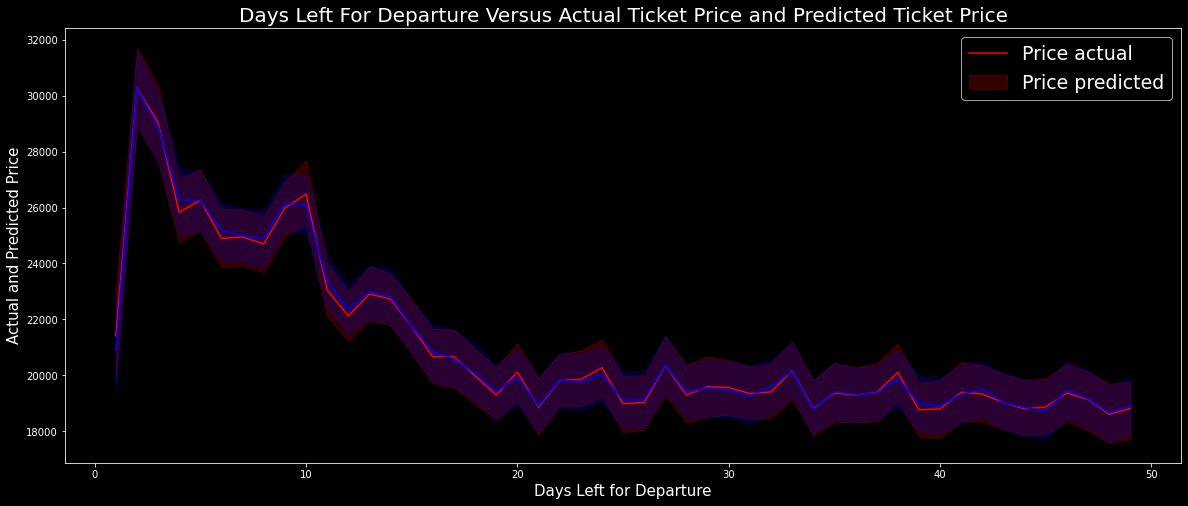

In [73]:
plt.figure(figsize=(20,8))
sns.lineplot(data=result,x='days_left',y='Price_actual',color='red')
sns.lineplot(data=result,x='days_left',y='Price_pred',color='blue')
plt.title('Days Left For Departure Versus Actual Ticket Price and Predicted Ticket Price',fontsize=20)
plt.legend(labels=['Price actual','Price predicted'],fontsize=19)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Actual and Predicted Price',fontsize=15)
plt.show()

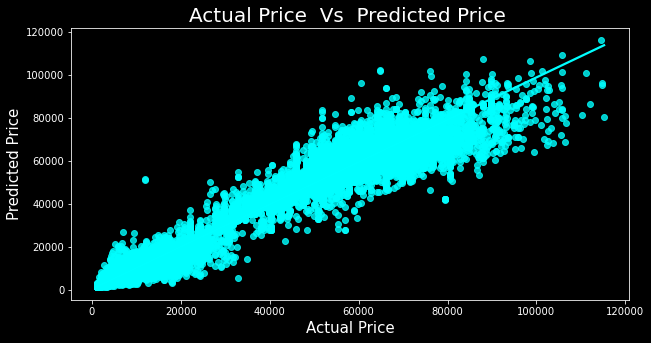

In [74]:
plt.figure(figsize=(10,5))
sns.regplot(x='Price_actual',y='Price_pred',data=result,color='cyan')
plt.title('Actual Price  Vs  Predicted Price ',fontsize=20)
plt.xlabel('Actual Price',fontsize=15)
plt.ylabel('Predicted Price',fontsize=15)
plt.show()